# Q1. Data Cleaning

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## For Cleaning and Decoding
import re
import string  
import html

## For Preparing Features to Model
import nltk

nltk.download('stopwords')

nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

## For Data Exploration
!pip install wordcloud
from wordcloud import WordCloud

## For building models
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC

!pip install xgboost
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

## For evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goela\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [346]:
#loading datasets
df_s = pd.read_csv('sentiment_analysis.csv')
df_US = pd.read_csv('US_Elections_2020.csv')

In [347]:
df_s.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


In [348]:
df_s.shape

(550391, 3)

In [349]:
df_s = df_s.drop('ID',axis=1)

In [350]:
df_s.head()

,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


In [351]:
print(pd.unique(df_s['label'].values))

[1 0]


In [352]:
df_US.head()

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN


In [353]:
df_US.shape

(2552, 3)

In [354]:
print(pd.unique(df_US['negative_reason'].values))

['covid19' 'others' nan 'discrimination' 'corruption' 'crime']


In [355]:
print(pd.unique(df_US['sentiment'].values))

[0 1]


In [356]:
s_t = list(df_s['text'])
US_t = list(df_US['text'])

s_l = list(df_s['label'])
US_l = list(df_US['sentiment'])

US_reason = list(df_US['negative_reason'])

### Removing URLs

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [357]:
temp=[]
for i in range(len(s_t)):
    a = s_t[i]
    s_t[i] = re.sub(r'http\S+|www.\S+|@\S+', '', s_t[i])
    if len(s_t[i])==0:
        s_t[i]=a
        print(a)
        temp.append(i)

In [358]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    US_t[i] = re.sub(r'http\S+|www.\S+|@\S+', '', US_t[i])
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

https://t.co/f4Y1bHLD8f'


In [359]:
for i in temp:
    US_t.pop(i)
    US_l.pop(i)
    US_reason.pop(i)

In [360]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    US_t[i] = re.sub(r'http\S+|www.\S+|@\S+', '', US_t[i])
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

### Replacing HTML character codes with an ASCII equivalent

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [361]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    US_t[i] = html.unescape(US_t[i])
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

In [362]:
temp=[]
for i in range(len(s_t)):
    a = s_t[i]
    s_t[i] = html.unescape(s_t[i])
    if len(s_t[i])==0:
        s_t[i]=a
        print(a)
        temp.append(i)

### Replacing punctuations

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [363]:
attributes = string.punctuation
print(attributes)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [364]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    for char in attributes:
        US_t[i] = US_t[i].replace(char, '')
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

### Replacing extra letters

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [366]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    US_t[i] = re.sub(r'\Ab', '', US_t[i]).strip()
    US_t[i] = re.sub(r'\ART', '', US_t[i]).strip()
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

b        
bRT          
b       
b      
b 
bRT           
b         
b       
b        


In [367]:
for i in temp:
    US_t.pop(i)
    US_l.pop(i)
    US_reason.pop(i)

In [368]:
temp=[]
for i in range(len(s_t)):
    a = s_t[i]
    s_t[i] = re.sub(r'\Ab', '', s_t[i]).strip()
    s_t[i] = re.sub(r'\ART', '', s_t[i]).strip()
    if len(s_t[i])==0:
        s_t[i]=a
        print(a)
        temp.append(i)

RT  


In [369]:
for i in temp:
    s_t.pop(i)
    s_l.pop(i)

### Removing emoticons and attributes

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [370]:
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U0001F1F2-\U0001F1F4"  # Macau flag
                              u"\U0001F1E6-\U0001F1FF"  # flags
                              u"\U0001F600-\U0001F64F"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U0001F1F2"
                              u"\U0001F1F4"
                              u"\U0001F620"
                              u"\u200d"
                              u"\u2640-\u2642"
                            "]+", flags=re.UNICODE)
print(emoji_pattern)

re.compile('[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿🇲-🇴🇦-🇿😀-🙏✂-➰Ⓜ-🉑🤦-🤷🇲🇴😠\u200d♀-♂]+')


In [371]:
temp=[]
for i in range(len(s_t)):
    a = s_t[i]
    s_t[i] = emoji_pattern.sub(r'', s_t[i])
    if len(s_t[i])==0:
        s_t[i]=a
        print(a)
        temp.append(i)

In [372]:
temp=[]
for i in range(len(US_t)):
    a = US_t[i]
    US_t[i] = emoji_pattern.sub(r'', US_t[i])
    if len(US_t[i])==0:
        US_t[i]=a
        print(a)
        temp.append(i)

### Converting to lower case

#### (If a tweet is getting empted after pre-processing it has been preserved)

In [373]:
for i in range(len(s_t)):
    s_t[i] = s_t[i].lower()

In [374]:
for i in range(len(US_t)):
    US_t[i] = US_t[i].lower()

#### Printing a sample of cleaned data

In [568]:
US_t[:30]

['so afraid of nov dec and jan even if bidenharris2020 winfrump has 3 months to do even more damage than he has',
 'lord sumption launches recovery  a new initiative to promote anotherway to deal with covid hysteria and rushed laws',
 'uber timing after biden advisors said they would put pressure on brazil  sanction  gov when elected',
 'every 107 seconds an american is dying from the trumpvirus nndonaldtrump thinks that is a successnnjoebiden',
 'the democrats embrace diversityandinclusion for all citizens that make our nation what it is each of us must vote to',
 'accelerating  rising when all americans killed by trumpvirus are',
 '961 dead americans in one day 240 times the number who died after benghazi the right lost',
 'covid19 coronavirus coronavirusuk covid uklockdown nif there is a national lockdown next week nshould we',
 'only reason  is doing more than 3 rallies is because he knows he is losing',
 'anyone whos concerned in the least about hunterbiden is a trump asskisser  h

### Removing the stop words

#### (If a tweet is getting empted after pre-processing it has been preserved) (such tweets have been printed as well)

In [376]:
with open('stop_words.txt','r') as f:
    stop_custom = f.readlines()
    stop_custom = [line.strip() for line in stop_custom]

In [377]:
stop_words = stopwords.words('english')
stop_words.extend(stop_custom)

temp=[]
US=[]
for j in range(len(US_t)):
    s=[]
    i = US_t[j]
    a = i
    for word in nltk.word_tokenize(i):
        if word not in stop_words:
            s.append(word)
    if len(s)==0:
        s = a
        print(s) 
        temp.append(j)
    US.append(s)

b       
b      
b 
b         
b       
b        


In [378]:
for i in temp:
    US_t.pop(i)
    US_l.pop(i)
    US_reason.pop(i)
    US.pop(i)

### Stemming and Lemmatizing (Also the part of BONUS section)

In [379]:
sb = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer() 
lemma_US = []
stem_US = []

for i in US:
    stemmed = [sb.stem(word) for word in i] # stemming the tweets
    stem_US.append(stemmed)

for i in US:
    temp = [lemmatizer.lemmatize(word) for word in i]
    lemma_US.append(temp)

In [380]:
temp=[]
s=[]
for j in range(len(s_t)):
    m=[]
    i = s_t[j]
    a = i
    for word in nltk.word_tokenize(i):
        if word not in stop_words:
            m.append(word)
    if len(m)==0:
        m = a
        print(m) 
        temp.append(j)
    s.append(m)

im proud of myself 
thank you    you    again
soon thank you
thank u
thank you 
it came thanks
thank you
please and thank you
be proud of who are
thank you so much
are you proud of me
thank you so  much
thanks
i cannot believe thank you
thank you very much
so proud
i miss you so much  
i miss her so much
this should make you proud
thank you
thank you so much  
thank you       
thank you
she said yes
thank you
go thank
so proud of you
thank you you too
im still not over this thank u
ah welcome home
thank you  
thank you 
looks like you made it
thank you  
thank you so much 
youd be proud
thanks for following
thank you  
ok me too lets go
thank you for following us
thank you
thank you  x
i believe it
thank you
thank you so much
thank you
welcome home     
thank you so much  
thank you thank you thank you
thanks for having me
thank you too
proud of you
so proud
i need it
i need it
yes yes yes
i need it
i need it
thank you for being you
thank you
thanks
i need it
welcome to
i need it
thank

already miss you
we really tried
not everyone
thank you
thank you so much 
this will never get old 
miss her
sorry not sorry
yes  you re  welcome
not really though
at least this wasnt me
sorry had too
this is not okay
couldnt put it any other way
so proud
i wont
its here thank you so much 
not this again
this is not okay
im sorry
i do not know how this is possible
i have no words
he said it not me
we are proud of you
sorry not sorry i had to
sorry
id rather not
i have no words
sorry but
actually he did not
we are not enough
your words are more important now than they ever were thank you for them
thank you so much everyone 
everyone needs to be sorry to
im not even sorry about it
youre so welcome
id rather not
im trying im really trying
i have no words
never
thats not what its saying
thank you to everyone at
should we go in here why not
thank you  
sorry not sorry
no he wont
not sorry for this
you are welcome here
this is not on
proud
im so proud of you
and im not even sorry
thank u
thi

welcome to     and
thank you
thank you so much 
thank you so so much 
proud of you
thank you
thanks for following
she couldnt get down after this
sorry
thank you for being you 
thank you
shes onto me
thank you  again 
im so proud 
and look up never down
thank you
i have never related to anything more
thank you
thank u
proud of you
im sorry
i miss home sometimes
not really
no we can not
im sorry
yes yes and yes
why its not all about looks
be proud of me
thank you
i like him sometimes
thank u
welcome back
too much
thank you
were so proud of you
thank you
thank you
thank you for this
thanks for following  please also like us at    will like back too
shes so little
ok got it
thank you so much d
im so proud of myself
doing it the right way
thanks
youre welcome
do this please and thanks
thank u
i got it thank you so much
thank you
thanks
there you go  so proud of you   
like it
are u proud
do this please thanks
thank u
i was proud of this
thank you
you should be proud of this
this is for you

In [381]:
sb = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer() 
lemma_s = []
stem_s = []

for i in s:
    stemmed = [sb.stem(word) for word in i] # stemming the tweets
    stem_s.append(stemmed)

for i in s:
    temp = [lemmatizer.lemmatize(word) for word in i]
    lemma_s.append(temp)

# Q2. Exploratory analysis 

### Assigning the political party (Republican/Democratic) to a given tweet

In [382]:
US_joined = [' '.join(tweet) for tweet in US]
clean_tweet = pd.DataFrame(US_joined, columns=['clean_tweet'])
clean_tweet.head()

,clean_tweet
0,afraid nov dec jan bidenharris2020 winfrump 3 ...
1,lord sumption launches recovery initiative pro...
2,uber timing biden advisors pressure brazil san...
3,107 seconds american dying trumpvirus nndonald...
4,democrats embrace diversityandinclusion citize...


In [383]:
label = pd.DataFrame(US_l, columns=['label'])
label.head()

,label
0,0
1,0
2,0
3,1
4,1


In [384]:
reason = pd.DataFrame(US_reason, columns=['reason'])
reason.head()

,reason
0,covid19
1,others
2,covid19
3,NaN
4,NaN


In [385]:
dataframe = pd.concat([clean_tweet,label,reason], axis =1)
dataframe.head()

,clean_tweet,label,reason
0,afraid nov dec jan bidenharris2020 winfrump 3 ...,0,covid19
1,lord sumption launches recovery initiative pro...,0,others
2,uber timing biden advisors pressure brazil san...,0,covid19
3,107 seconds american dying trumpvirus nndonald...,1,NaN
4,democrats embrace diversityandinclusion citize...,1,NaN


In [386]:
dataframe.shape

(2536, 3)

**Concept**

We will look for certain keywords in a tweet to classify the tweet with a political party.

1. Republican : Keywords - 'republican', 'donald', 'trump', 'donaldtrump', 'realdonaldtrump', 'georgebush'.....
2. Democratic : Keywords - 'democrat', 'liberal', 'barak', 'obama', 'barakobama', 'michelle', 'obama', 'michelleobama'.....

**Process**

1. To look if a tweet contains keywords from two or more parties; classify the tweet as 'Mixed'
2. To look if the tweets contain keywords only from a particular party; classify them accordingly
3. If none of the keywords are found; classify it as 'None'

In [387]:
# defining key words

Republican = '|'.join(['republican', 'donald', 'trump', 'donaldtrump', 'realdonaldtrump', 'georgebush', 'george', 'bush', 'walker', 'mike', 'pence', 'mikepence', 'conservative', 'thebushcenter', 'georgewbush','mike_pence','secondlady', 'vp pence', 'govpencein', 'dbongino', 'Dan', 'Bongino'])
Democratic = '|'.join(['democrat', 'liberal', 'barak', 'obama', 'barakobama', 'michelle', 'obama', 'michelleobama', 'hillary', 'clinton','hillaryclinton', 'rodham','hillaryrodhamclinton', 'bill', 'clinton', 'billclinton', 'william', 'jefferson', 'clinton', 'williamclinton' , 'jeffersonclinton', 'williamjeffersonclinton', 'presidentclinton', 'jfk', 'john', 'kennedy', 'johnkennedy','kamala', 'harris', 'kamalaharris', 'johnfkennedy', 'senjohnkennedy', 'joe', 'biden', 'joebiden','joseph', 'robinette', 'biden', 'josephbiden', 'josephrobinettebiden', 'josephbiden', 'bernie', 'sanders','berniesanders', 'speakerpelosi', 'teampelosi','nancy', 'pelosi','nancypelosi','adambennettschiff','adam','bennett','schiff','adamschiff','bennettschiff', 'elizabethannwarren','elizabeth','ann','warren','elizabethwarren','annwarren','ewarren'])

dataframe['political_party'] = '0' ## initiating an empty colum in the dataframe to be filled with political parties

In [388]:
for i in range (dataframe.shape[0]):
    if ((pd.Series(dataframe['clean_tweet'][i]).str.contains(Republican)[0]) & (pd.Series(dataframe['clean_tweet'][i]).str.contains(Democratic)[0])):
        dataframe['political_party'][i] = 'Mixed'
        
    elif pd.Series(dataframe['clean_tweet'][i]).str.contains(Republican)[0]:
        dataframe['political_party'][i] = 'Republican'
        
    elif pd.Series(dataframe['clean_tweet'][i]).str.contains(Democratic)[0]:
        dataframe['political_party'][i] = 'Democratic'
        
    else:
        dataframe['political_party'][i] = 'None'

C:\Users\goela\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\goela\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\goela\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we 

In [389]:
dataframe.head()

,clean_tweet,label,reason,political_party
0,afraid nov dec jan bidenharris2020 winfrump 3 ...,0,covid19,Democratic
1,lord sumption launches recovery initiative pro...,0,others,None
2,uber timing biden advisors pressure brazil san...,0,covid19,Democratic
3,107 seconds american dying trumpvirus nndonald...,1,NaN,Mixed
4,democrats embrace diversityandinclusion citize...,1,NaN,Democratic


In [390]:
dataframe.groupby('political_party').size()

political_party
Democratic     626
Mixed          185
None          1256
Republican     469
dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

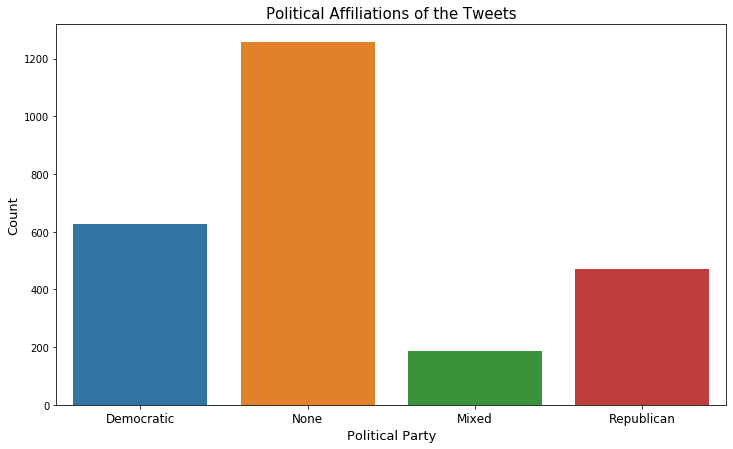

In [391]:
plt.figure(figsize=(12,7))

ax = sns.countplot(x="political_party", data=dataframe)

ax.set_title('Political Affiliations of the Tweets', fontsize = 15)

plt.xlabel('Political Party', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(fontsize = 12)

In [392]:
mix_pos = dataframe[(dataframe['label']==1) & (dataframe['political_party']=='Mixed')]['political_party'].count()
mix_neg = dataframe[(dataframe['label']==0) & (dataframe['political_party']=='Mixed')]['political_party'].count()

dem_pos = dataframe[(dataframe['label']==1) & (dataframe['political_party']=='Democratic')]['political_party'].count()
dem_neg = dataframe[(dataframe['label']==0) & (dataframe['political_party']=='Democratic')]['political_party'].count()

rep_pos = dataframe[(dataframe['label']==1) & (dataframe['political_party']=='Republican')]['political_party'].count()
rep_neg = dataframe[(dataframe['label']==0) & (dataframe['political_party']=='Republican')]['political_party'].count()

total_neg = dataframe[(dataframe['label']==1)]['political_party'].count()
total_pos = dataframe[(dataframe['label']==0)]['political_party'].count()

In [393]:
print ("% of Positive tweets for Each party out of the their respective total tweets:")
print ("Democratic: %0.2f, Republican: %0.2f" % ((dem_pos/(dem_pos+dem_neg)), (rep_pos/(rep_pos+rep_neg))))

print ("\n% of Negative tweets for Each party out of the their respective total tweets:")
print ("Democratic: %0.2f, Republican: %0.2f" % ((dem_neg/(dem_pos+dem_neg)), (rep_neg/(rep_pos+rep_neg))))

print ("\nRatio of Pos-vs-Neg in Mixed Tweets: %0.2f" % (mix_pos/mix_neg))

% of Positive tweets for Each party out of the their respective total tweets:
Democratic: 0.56, Republican: 0.43

% of Negative tweets for Each party out of the their respective total tweets:
Democratic: 0.44, Republican: 0.57

Ratio of Pos-vs-Neg in Mixed Tweets: 1.08


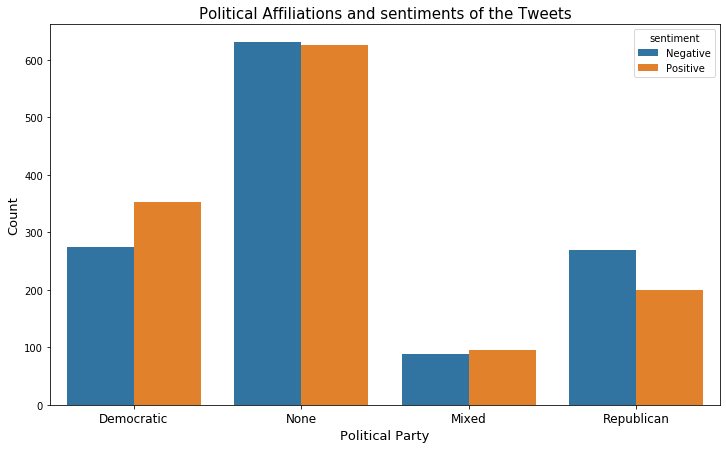

In [394]:
plt.figure(figsize=(12,7))

ax = sns.countplot(x="political_party",hue="label", data=dataframe)

ax.set_title('Political Affiliations and sentiments of the Tweets', fontsize = 15)

plt.xlabel('Political Party', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(fontsize = 12)

plt.legend(title='sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()

Some Inferences:
    
 - Greater Proportion of the tweets are unclassified
 - Republican party has the most negative tweets
 - Democratic party has the most positive tweets
 
### Let's plot wordclouds to find out which words are dominant in the cleaned dataset

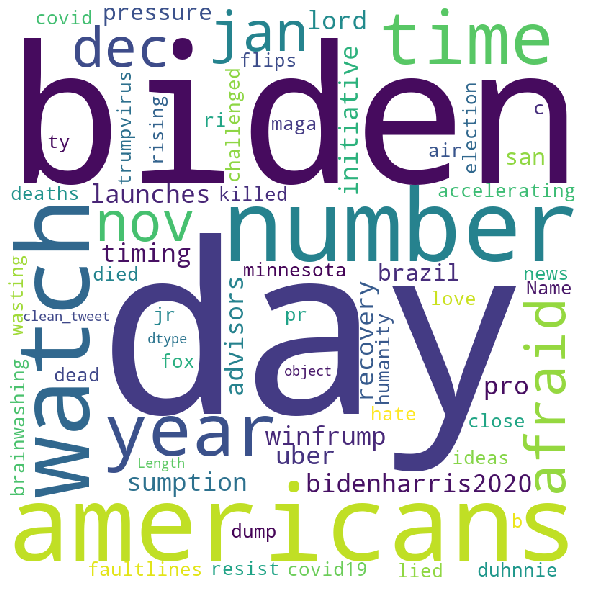

In [395]:
## WordCloud for NEGATIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(dataframe[dataframe['label']==0]['clean_tweet']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Words such as 'watch', 'biden', 'day', 'americans' appear most frequently in NEGATIVE tweets in Elections Dataset**

**There seems to be a stronger positive sentiment appearing towards the Democratic party as 'americans', 'day' and 'biden' is found in the majority of the positive tweets**

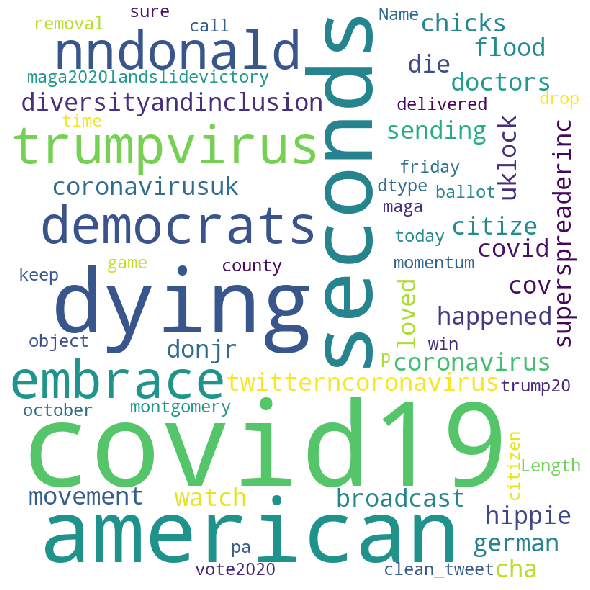

In [396]:
## WordCloud for POSITIVE tweets in Elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(dataframe[dataframe['label']==1]['clean_tweet']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Words such as 'covid19', 'dying', 'american' and 'trump virus' appear most frequently in NEGATIVE tweets in Elections Dataset**

**This could suggest that most of the public's negativity is directed towards COVID19 and dying americans and related to trump as trump virus**

In [397]:
s_joined = [' '.join(tweet) for tweet in s]
clean_tweet2 = pd.DataFrame(s_joined, columns=['clean_tweet'])
clean_tweet2.head()

,clean_tweet
0,josh jenkins forward tab breeders crown super ...
1,congratulations pakistan no1testteam odds jipa...
2,september maine mendoza ’ surprise thanksgivin...
3,newly painted walls custodial painters summer ...
4,excited july 2017 feschotte lab relocating mbg


In [398]:
label2 = pd.DataFrame(s_l, columns=['label'])
label2.head()

,label
0,1
1,1
2,1
3,1
4,1


In [399]:
dataframe2 = pd.concat([clean_tweet2,label2], axis =1)
dataframe2.head()

,clean_tweet,label
0,josh jenkins forward tab breeders crown super ...,1
1,congratulations pakistan no1testteam odds jipa...,1
2,september maine mendoza ’ surprise thanksgivin...,1
3,newly painted walls custodial painters summer ...,1
4,excited july 2017 feschotte lab relocating mbg,1


In [400]:
dataframe2.shape

(550390, 2)

In [401]:
dataframe2.head()

,clean_tweet,label
0,josh jenkins forward tab breeders crown super ...,1
1,congratulations pakistan no1testteam odds jipa...,1
2,september maine mendoza ’ surprise thanksgivin...,1
3,newly painted walls custodial painters summer ...,1
4,excited july 2017 feschotte lab relocating mbg,1


### Let's plot wordclouds to find out which words are dominant in the general tweets

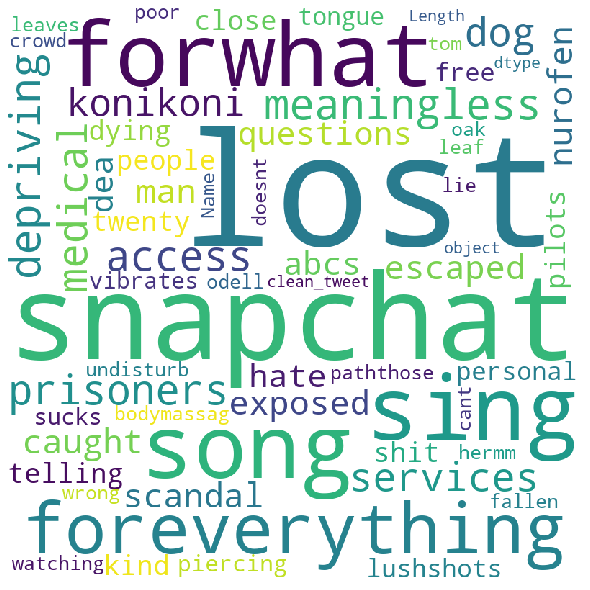

In [402]:
## WordCloud for NEGATIVE tweets in general tweets

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(dataframe2[dataframe2['label']==0]['clean_tweet']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

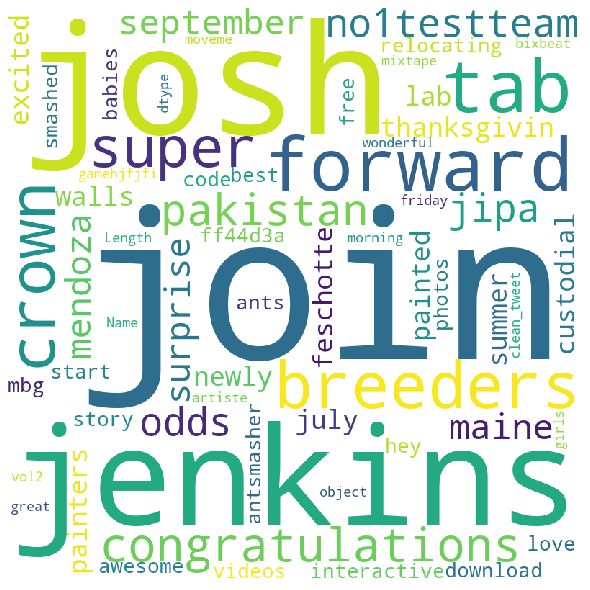

In [403]:
## WordCloud for POSITIVE tweets in general tweets

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(dataframe2[dataframe2['label']==1]['clean_tweet']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Q3. Model preparation and Q4. Model Implementation and tuning

### Test Train Split for both the datasets along with stratification

In [404]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(stem_s, s_l, test_size=0.3, stratify = s_l, random_state=42)

In [405]:
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(lemma_s, s_l, test_size=0.3, stratify = s_l, random_state=42)

In [406]:
X_train_USs, X_test_USs, y_train_USs, y_test_USs = train_test_split(stem_US, US_l, test_size=0.3, stratify = US_l, random_state=42)

In [407]:
X_train_USl, X_test_USl, y_train_USl, y_test_USl = train_test_split(lemma_US, US_l, test_size=0.3, stratify = US_l, random_state=42)

In [408]:
train_tf_ss = [' '.join(tweet) for tweet in X_train_ss]
train_tf_sl = [' '.join(tweet) for tweet in X_train_sl]
train_tf_USs = [' '.join(tweet) for tweet in X_train_USs]
train_tf_USl = [' '.join(tweet) for tweet in X_train_USl]

test_tf_ss = [' '.join(tweet) for tweet in X_test_ss]
test_tf_sl = [' '.join(tweet) for tweet in X_test_sl]
test_tf_USs = [' '.join(tweet) for tweet in X_test_USs]
test_tf_USl = [' '.join(tweet) for tweet in X_test_USl]

### Using the TFIDF - vectorizer

### on both stemmed and lemmatized data (BONUS Section)

#### TF-IDF creates a set of its own vocabulary from the entire set of documents. It is short for “term frequency - inverse document frequency”

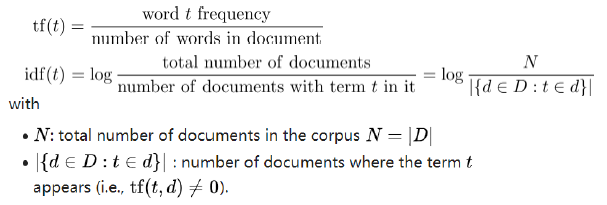

#### In this way, the method addresses the fact that all words should not be weighted equally. It weighs by indicating the words that are most unique to the document, and best used to characterize it.

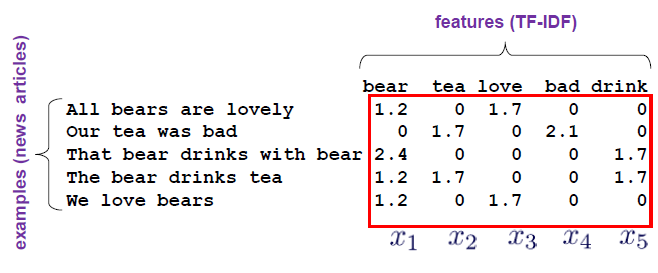

Source: From Course Slides

In [409]:
vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)

array_train_tf_ss = vectorizer_TFIDF_gen.fit_transform(train_tf_ss)
array_test_tf_ss = vectorizer_TFIDF_gen.transform(test_tf_ss)

array_train_tf_sl = vectorizer_TFIDF_gen.fit_transform(train_tf_sl)
array_test_tf_sl = vectorizer_TFIDF_gen.transform(test_tf_sl)

array_train_tf_USs = vectorizer_TFIDF_gen.fit_transform(train_tf_USs)
array_test_tf_USs = vectorizer_TFIDF_gen.transform(test_tf_USs)

array_train_tf_USl = vectorizer_TFIDF_gen.fit_transform(train_tf_USl)
array_test_tf_USl = vectorizer_TFIDF_gen.transform(test_tf_USl)

### Using the Bag of Words - vectorizer

#### on both stemmed and lemmatized data (BONUS Section)

#### Bag of Words counts the frequency of words in a document. The output of the bag of words model is a frequency vector

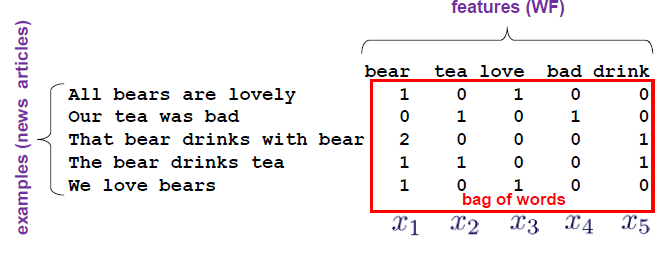

Source: From Course Slides

In [410]:
vectorizer_WF_gen = CountVectorizer(max_features=1000)

array_train_WF_ss = vectorizer_WF_gen.fit_transform(train_tf_ss)
array_test_WF_ss = vectorizer_WF_gen.transform(test_tf_ss)

array_train_WF_sl = vectorizer_WF_gen.fit_transform(train_tf_sl)
array_test_WF_sl = vectorizer_WF_gen.transform(test_tf_sl)

array_train_WF_USs = vectorizer_WF_gen.fit_transform(train_tf_USs)
array_test_WF_USs = vectorizer_WF_gen.transform(test_tf_USs)

array_train_WF_USl = vectorizer_WF_gen.fit_transform(train_tf_USl)
array_test_WF_USl = vectorizer_WF_gen.transform(test_tf_USl)

### Implementing the 7 models

### for both stemmed and lemmatized data and also for both the vectorizers (BONUS Section)

### Naive-Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/09/Bayes_rule-300x172.png)

Above,

- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

Pros:

- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

Cons:

- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

Source: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [413]:
def naive_bayes_multinomialNB(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Naive-Bayes MultinomialNB Classifier'''
    
    model_nbg = MultinomialNB()
    model_nbg.fit(X_train,y_train)
    
    predictions = model_nbg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Naive-Bayes MultinomialNB Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [414]:
nb_bow_s = naive_bayes_multinomialNB(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
nb_bow_l = naive_bayes_multinomialNB(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
nb_tf_s = naive_bayes_multinomialNB(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
nb_tf_l = naive_bayes_multinomialNB(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

The accuracy of the Naive-Bayes MultinomialNB Classifier model is:  90.15364862491445
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     53715
           1       0.91      0.95      0.93    111402

    accuracy                           0.90    165117
   macro avg       0.90      0.87      0.88    165117
weighted avg       0.90      0.90      0.90    165117

[[ 42864  10851]
 [  5407 105995]]
The accuracy of the Naive-Bayes MultinomialNB Classifier model is:  88.90180902027048
              precision    recall  f1-score   support

           0       0.88      0.76      0.82     53715
           1       0.89      0.95      0.92    111402

    accuracy                           0.89    165117
   macro avg       0.89      0.86      0.87    165117
weighted avg       0.89      0.89      0.89    165117

[[ 40783  12932]
 [  5393 106009]]
The accuracy of the Naive-Bayes MultinomialNB Classifier model is:  89.43234191512684
              prec

### Logistic Regression

Logistic regression is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

Pros:

- Convenient probability scores for observations
- Efficient implementations available across tools
- Multi-collinearity is not really an issue and can be countered with L2 regularization to an extent
- Wide spread industry comfort for logistic regression solutions

Cons:

- Doesn’t perform well when feature space is too large
- Doesn’t handle large number of categorical features/variables well
- Relies on transformations for non-linear features
- Relies on entire data

Source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [320]:
def logreg(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Logistic Regression'''
    
    model_lg = LogisticRegression()
    model_lg.fit(X_train,y_train)
    
    predictions = model_lg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Log Reg model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return model_lg, predictions, score

In [321]:
_, _, logreg_bow_s = logreg(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
_, _, logreg_bow_l = logreg(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
_, _, logreg_tf_s = logreg(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
_, _, logreg_tf_l = logreg(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Log Reg model is:  92.22490718702497
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53715
           1       0.95      0.93      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.91      0.92      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48302   5413]
 [  7425 103977]]
The accuracy of the Log Reg model is:  91.56658611772258
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     53715
           1       0.95      0.92      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.90      0.91      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48319   5396]
 [  8529 102873]]
The accuracy of the Log Reg model is:  92.22551281818347
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53

### Decision Trees Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. Simply put, a decision tree uses a tree-like data structure (typically, a binary tree) to make a model of the data (creating a sense of the data provided) using a bunch of if-else conditions at every node of the tree. It can be used for both classification and regression analysis.

Greedy nature of Decision Trees:

It should be clear that decision stumps are a fairly simple class of models that use only 1 feature at a time and hence, not very accurate for most tasks. A decision tree, on the other hand, considers a lot of features and allows a sequence of split based on these features. It is important to note that they are a very general class of models and can attain high accuracies but the task of finding the optimal decision tree is not feasible computationally and therefore, we use what is called a greedy approach to choose our decision tree.

Advantages:

- Easy to understand - Decision trees and the underlying principle that they work on are easy to interpret and understand as compared to other complex machine learning algorithms.
- Fast to learn - Decision trees are relatively quite fast to learn as you will see when you learn about other complex algorithms.

Disadvantages:

- Difficult to find an optimal set of rules - As we have already discussed, getting an optimal set of rules is hard and it is computationally inefficient to find such a set of rules and we have to use a greedy approach instead.
- Greedy splitting not accurate - This may require building very deep trees which might not be a good idea.

Source: https://adityashrm21.github.io/Decision-Trees/

In [322]:
def decision_tree(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Decision Tree Classifier'''
    
    model_dtc =  DecisionTreeClassifier(random_state=1)
    model_dtc.fit(X_train,y_train)
    
    predictions = model_dtc.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Decision Tree Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return score

In [323]:
dt_bow_s = decision_tree(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
dt_bow_l = decision_tree(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
dt_tf_s = decision_tree(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
dt_tf_l = decision_tree(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

The accuracy of the Decision Tree Classifier model is:  91.1432499379228
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     53715
           1       0.94      0.93      0.93    111402

    accuracy                           0.91    165117
   macro avg       0.90      0.90      0.90    165117
weighted avg       0.91      0.91      0.91    165117

[[ 47437   6278]
 [  8346 103056]]
The accuracy of the Decision Tree Classifier model is:  90.77199803775504
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     53715
           1       0.94      0.92      0.93    111402

    accuracy                           0.91    165117
   macro avg       0.89      0.90      0.90    165117
weighted avg       0.91      0.91      0.91    165117

[[ 47539   6176]
 [  9061 102341]]
The accuracy of the Decision Tree Classifier model is:  91.1432499379228
              precision    recall  f1-score   support

 

### Random Forests Classifier

Random forest is just an improvement over the top of the decision tree algorithm. The core idea behind Random Forest is to generate multiple small decision trees from random subsets of the data (hence the name “Random Forest”).
Each of the decision tree gives a biased classifier (as it only considers a subset of the data). They each capture different trends in the data. This ensemble of trees is like a team of experts each with a little knowledge over the overall subject but thourough in their area of expertise.

Now, in case of classification the majority vote is considered to classify a class. In analogy with experts, it is like asking the same multiple choice question to each expert and taking the answer as the one that most no. of experts vote as correct. In case of Regression, we can use the avg. of all trees as our prediction.In addition to this, we can also weight some more decisive trees high relative to others by testing on the validation data.

![](https://dimensionless.in/wp-content/uploads/RandomForest_blog_files/figure-html/rf.png)

The advantages of random forests include:

- The predictive performance can compete with the best supervised learning algorithms
- They provide a reliable feature importance estimate
- They offer efficient estimates of the test error without incurring the cost of repeated model training associated with cross-validation

On the other hand, random forests also have a few disadvantages:

- An ensemble model is inherently less interpretable than an individual decision tree
- Training a large number of deep trees can have high computational costs (but can be parallelized) and use a lot of memory
- Predictions are slower, which may create challenges for applications

Sources: 
- https://www.oreilly.com/library/view/hands-on-machine-learning/9781789346411/e17de38e-421e-4577-afc3-efdd4e02a468.xhtml
- https://dimensionless.in/introduction-to-random-forest/

In [324]:
def ran_forest(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Random Forest Classifier'''
    
    model_rfc =  RandomForestClassifier()
    model_rfc.fit(X_train,y_train)
    
    predictions = model_rfc.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Random Forest Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [325]:
rf_bow_s = ran_forest(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
rf_bow_l = ran_forest(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
rf_tf_s = ran_forest(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
rf_tf_l = ran_forest(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  91.97054210044998
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     53715
           1       0.95      0.93      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.91      0.91      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48027   5688]
 [  7570 103832]]


C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  91.41638959041165
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     53715
           1       0.95      0.92      0.94    111402

    accuracy                           0.91    165117
   macro avg       0.90      0.91      0.90    165117
weighted avg       0.92      0.91      0.91    165117

[[ 48023   5692]
 [  8481 102921]]


C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  92.04382347062992
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     53715
           1       0.95      0.93      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.91      0.91      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48067   5648]
 [  7489 103913]]


C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  91.46605134540961
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     53715
           1       0.95      0.92      0.94    111402

    accuracy                           0.91    165117
   macro avg       0.90      0.91      0.90    165117
weighted avg       0.92      0.91      0.92    165117

[[ 47988   5727]
 [  8364 103038]]


### XGBoost Classifier

XGBoost stands for Extreme Gradient Boosting. It is a supervised learning algorithm. It is a library for developing fast and high performance gradient boosting tree models. Parallel computation behind the scenes is what makes it this fast. It has been very popular in recent years due to its versatiltiy, scalability and efficiency.

XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture.

Pros:

- Extremely fast (parallel computation).
- Highly efficient.
- Versatile (Can be used for classification, regression or ranking).
- Can be used to extract variable importance.
- Do not require feature engineering (missing values imputation, scaling and normalization)

Cons:

- Only work with numeric features.
- Leads to overfitting if hyperparameters are not tuned properly.

Sources:
- https://dimensionless.in/introduction-to-xgboost/
- https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

In [326]:
def xgb_classifier( X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on XGBoost Classifier'''
    
    model_xgb = XGBClassifier()
    model_xgb.fit(X_train,y_train)
    
    predictions = model_xgb.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the XGBoost Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [327]:
xgb_bow_s = xgb_classifier(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
xgb_bow_l = xgb_classifier(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
xgb_tf_s = xgb_classifier(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
xgb_tf_l = xgb_classifier(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

The accuracy of the XGBoost Classifier model is:  90.37228147313724
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     53715
           1       0.96      0.89      0.93    111402

    accuracy                           0.90    165117
   macro avg       0.88      0.91      0.89    165117
weighted avg       0.91      0.90      0.91    165117

[[49830  3885]
 [12012 99390]]
The accuracy of the XGBoost Classifier model is:  89.65703107493475
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     53715
           1       0.97      0.88      0.92    111402

    accuracy                           0.90    165117
   macro avg       0.88      0.91      0.89    165117
weighted avg       0.91      0.90      0.90    165117

[[50200  3515]
 [13563 97839]]
The accuracy of the XGBoost Classifier model is:  90.37228147313724
              precision    recall  f1-score   support

           0       0.81  

To better understand the above tree-based algorithms, see below for a simple analogy to know about their evolution

Imagine that you are a hiring manager interviewing several candidates with excellent qualifications. Each step of the evolution of tree-based algorithms can be viewed as a version of the interview process.

- Decision Tree: Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.
- Bagging: Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.
- Random Forest: It is a bagging-based algorithm with a key difference wherein only a subset of features is selected at random. In other words, every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).
- Boosting: This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.
- Gradient Boosting: A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.
- XGBoost: Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

Source: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

### Linear SVC Classifier

Support vector machines so called as SVM is a supervised learning algorithm which can be used for classification and regression problems as support vector classification (SVC) and support vector regression (SVR)

SVM is based on the idea of finding a hyperplane that best separates the features into different domains

The points closest to the hyperplane are called as the support vector points and the distance of the vectors from the hyperplane are called the margins.

![](https://miro.medium.com/max/410/0*luhI3gW7WnXfLnhA.jpg)

Pros:

- It is really effective in the higher dimension.
- Effective when the number of features are more than training examples.
- Best algorithm when classes are separable
- The hyperplane is affected by only the support vectors thus outliers have less impact.
- SVM is suited for extreme case binary classification.

Cons:

- For larger dataset, it requires a large amount of time to process.
- Does not perform well in case of overlapped classes.
- Selecting, appropriately hyperparameters of the SVM that will allow for sufficient generalization performance.
- Selecting the appropriate kernel function can be tricky.

Source: https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

In [328]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on SVM (Support Vector Machines) Classifier'''
    
    model_svm = LinearSVC(random_state=0, max_iter=60000)
    model_svm.fit(X_train,y_train)
    
    predictions = model_svm.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the SVM Classifier model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))    
    
    return score

In [329]:
svm_bow_s = svm_classifier(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
svm_bow_l = svm_classifier(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
svm_tf_s = svm_classifier(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
svm_tf_l = svm_classifier(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

The accuracy of the SVM Classifier model is:  92.12800620166306
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53715
           1       0.95      0.93      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.91      0.92      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48521   5194]
 [  7804 103598]]
The accuracy of the SVM Classifier model is:  91.45091056644682
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     53715
           1       0.95      0.92      0.94    111402

    accuracy                           0.91    165117
   macro avg       0.90      0.91      0.90    165117
weighted avg       0.92      0.91      0.92    165117

[[ 48701   5014]
 [  9102 102300]]
The accuracy of the SVM Classifier model is:  92.12558367702901
              precision    recall  f1-score   support

           0       0.86      

### K-Nearest Neighbors

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

When we say a technique is non-parametric , it means that it does not make any assumptions on the underlying data distribution. In other words, the model structure is determined from the data.

It does not use the training data points to do any generalization. In other words, there is no explicit training phase or it is very minimal. This also means that the training phase is pretty fast. Lack of generalization means that KNN keeps all the training data. To be more exact, all (or most) the training data is needed during the testing phase.

![](https://miro.medium.com/max/650/0*Sk18h9op6uK9EpT8.)

Pros:

- No assumptions about data — useful, for example, for nonlinear data
- Simple algorithm — to explain and understand/interpret
- High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
- Versatile — useful for classification or regression

Cons:

- Computationally expensive — because the algorithm stores all of the training data
- High memory requirement
- Stores all (or almost all) of the training data
- Prediction stage might be slow (with big N)
- Sensitive to irrelevant features and the scale of the data

Source: https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7

In [330]:
def knn(X_train, X_test, y_train, y_test,neighbors=5):
    
    '''Function for modeling based on K-Nearest Neighbors'''
    
    model_knn =  KNeighborsClassifier(n_neighbors=neighbors)
    model_knn.fit(X_train,y_train)
    
    predictions = model_knn.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the KNN model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return score

In [331]:
knn_bow_s = knn(array_train_WF_ss,array_test_WF_ss,y_train_ss,y_test_ss)
knn_bow_l = knn(array_train_WF_sl,array_test_WF_sl,y_train_sl,y_test_sl)
knn_tf_s = knn(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)
knn_tf_l = knn(array_train_tf_sl,array_test_tf_sl,y_train_sl,y_test_sl)

The accuracy of the KNN model is:  90.18211328936451
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     53715
           1       0.94      0.91      0.93    111402

    accuracy                           0.90    165117
   macro avg       0.89      0.89      0.89    165117
weighted avg       0.90      0.90      0.90    165117

[[ 46978   6737]
 [  9474 101928]]
The accuracy of the KNN model is:  89.50804580994082
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     53715
           1       0.94      0.90      0.92    111402

    accuracy                           0.90    165117
   macro avg       0.88      0.89      0.88    165117
weighted avg       0.90      0.90      0.90    165117

[[ 47285   6430]
 [ 10894 100508]]
The accuracy of the KNN model is:  86.28669367781634
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     53715
        

### Comparing the accuracies of all the models for stemmed data

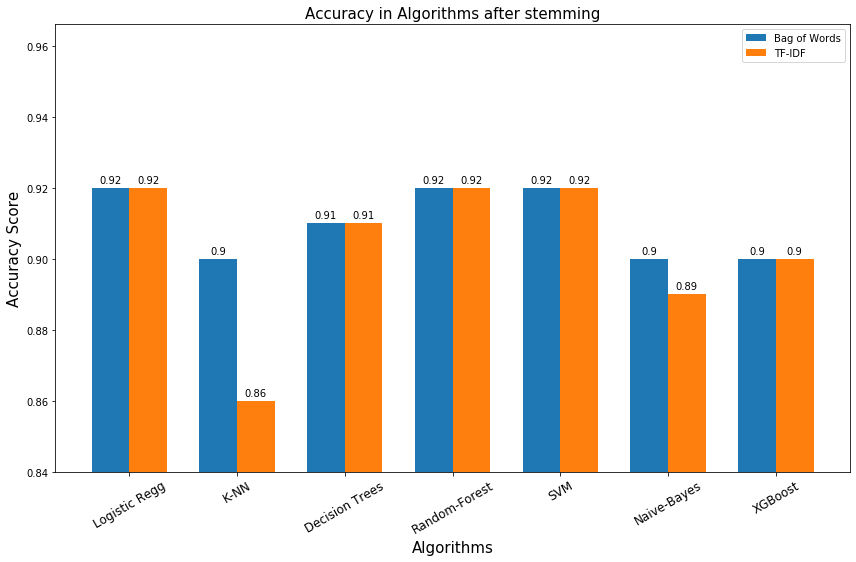

In [337]:
labels = ['Logistic Regg', 'K-NN', 'Decision Trees', 'Random-Forest', 'SVM', 'Naive-Bayes', 'XGBoost']
y_bow_s = [round(logreg_bow_s,2), round(knn_bow_s,2), round(dt_bow_s,2), round(rf_bow_s,2), round(svm_bow_s,2), round(nb_bow_s,2), round(xgb_bow_s,2)]
y_tf_s = [round(logreg_tf_s,2), round(knn_tf_s,2), round(dt_tf_s,2), round(rf_tf_s,2), round(svm_tf_s,2), round(nb_tf_s,2), round(xgb_tf_s,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, y_bow_s, width, label='Bag of Words')
rects2 = ax.bar(x + width/2, y_tf_s, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after stemming', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(ymin = 0.84)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

### Comparing the accuracies of all the models for lemmatized data

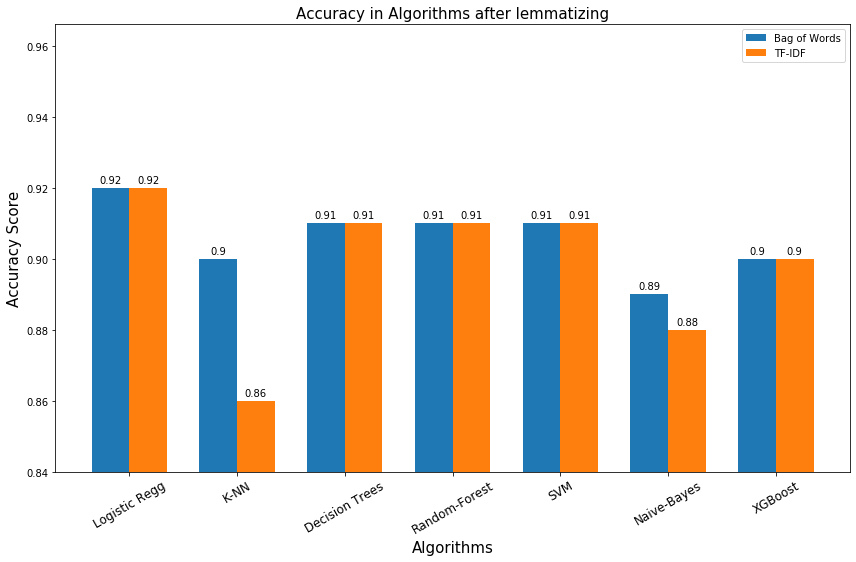

In [338]:
labels = ['Logistic Regg', 'K-NN', 'Decision Trees', 'Random-Forest', 'SVM', 'Naive-Bayes', 'XGBoost']
y_bow_l = [round(logreg_bow_l,2), round(knn_bow_l,2), round(dt_bow_l,2), round(rf_bow_l,2), round(svm_bow_l,2), round(nb_bow_l,2), round(xgb_bow_l,2)]
y_tf_l = [round(logreg_tf_l,2), round(knn_tf_l,2), round(dt_tf_l,2), round(rf_tf_l,2), round(svm_tf_l,2), round(nb_tf_l,2), round(xgb_tf_l,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, y_bow_l, width, label='Bag of Words')
rects2 = ax.bar(x + width/2, y_tf_l, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after lemmatizing', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(ymin = 0.84)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

### Comparing the accuracies of all the models

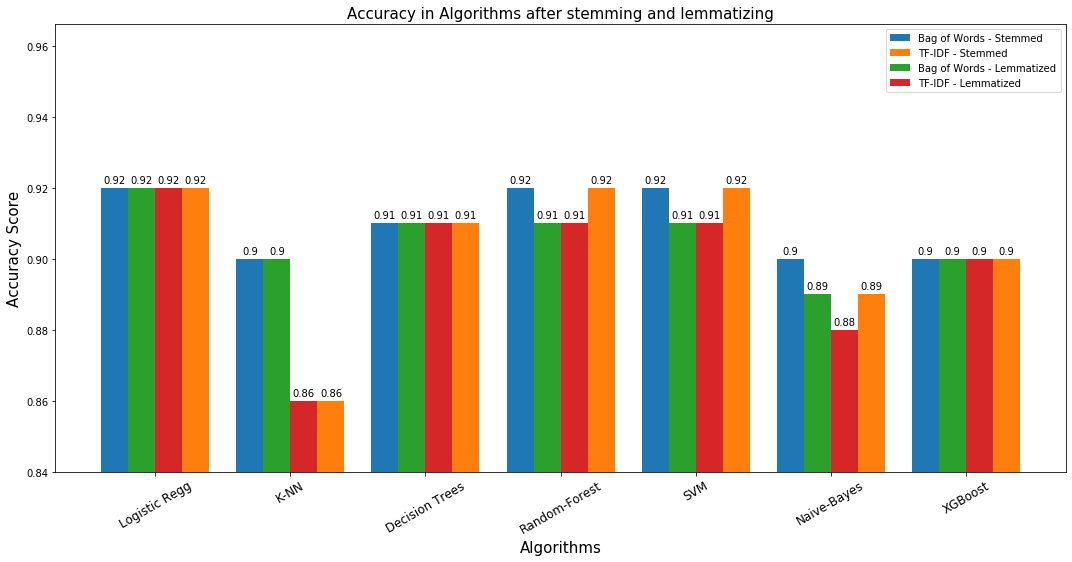

In [340]:
width = 0.2

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width*3/2, y_bow_s, width, label='Bag of Words - Stemmed')
rects2 = ax.bar(x + width*3/2, y_tf_s, width, label='TF-IDF - Stemmed')
rects3 = ax.bar(x - width/2, y_bow_l, width, label='Bag of Words - Lemmatized')
rects4 = ax.bar(x + width/2, y_tf_l, width, label='TF-IDF - Lemmatized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after stemming and lemmatizing' , fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_ylim(ymin = 0.84)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

#### the best accuracy is coming for the Logestic Regression model

### hyperparameter tuning and cross-validation of the best model (Logestic Regression TF-IDF stemmed )

In [344]:
Log_Reg=LogisticRegression()

steps = [('Log_Reg', Log_Reg)]

pipeline = Pipeline(steps)

parameters = {'Log_Reg__C' : [0.1,0.5,1,5,10,50,100] , 'Log_Reg__solver' : ['newton-cg','lbfgs','sag','saga']}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit( array_train_tf_ss,y_train_ss)  

print('Best score and parameter combination = ')
# array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss
print(CV.best_score_)
print(CV.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 29.5min finished


Best score and parameter combination = 
0.9219799985983964
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'sag'}


C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Running the tunned model

In [434]:
def logreg_tunned_1(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Logistic Regression'''
    
    model_lg = LogisticRegression(C= 0.1 ,solver= 'sag' )
    model_lg.fit(X_train,y_train)
    
    predictions = model_lg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Log Reg model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return model_lg, predictions, score

In [435]:
_, _, logreg_tunned_ = logreg_tunned_1(array_train_tf_ss,array_test_tf_ss,y_train_ss,y_test_ss)

The accuracy of the Log Reg model is:  92.22914660513453
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53715
           1       0.95      0.93      0.94    111402

    accuracy                           0.92    165117
   macro avg       0.91      0.92      0.91    165117
weighted avg       0.92      0.92      0.92    165117

[[ 48259   5456]
 [  7375 104027]]


### Running the tunned model on US elections data set

In [436]:
_, _, logreg_bow_USs = logreg_tunned_1(array_train_WF_USs,array_test_WF_USs,y_train_USs,y_test_USs)
_, _, logreg_bow_USl = logreg_tunned_1(array_train_WF_USl,array_test_WF_USl,y_train_USl,y_test_USl)
_, _, logreg_tf_USs = logreg_tunned_1(array_train_tf_USs,array_test_tf_USs,y_train_USs,y_test_USs)
_, _, logreg_tf_USl = logreg_tunned_1(array_train_tf_USl,array_test_tf_USl,y_train_USl,y_test_USl)

The accuracy of the Log Reg model is:  70.43363994743758
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       379
           1       0.68      0.78      0.73       382

    accuracy                           0.70       761
   macro avg       0.71      0.70      0.70       761
weighted avg       0.71      0.70      0.70       761

[[239 140]
 [ 85 297]]
The accuracy of the Log Reg model is:  70.03942181340341
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       379
           1       0.68      0.76      0.72       382

    accuracy                           0.70       761
   macro avg       0.70      0.70      0.70       761
weighted avg       0.70      0.70      0.70       761

[[242 137]
 [ 91 291]]
The accuracy of the Log Reg model is:  76.87253613666229
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       379
           1       0

### Comparing the predictions to the original sentiments for each party

In [534]:
_, predictions, logreg_tf_USs = logreg_tunned_1(array_train_tf_USs,array_test_tf_USs,y_train_USs,y_test_USs)

The accuracy of the Log Reg model is:  76.87253613666229
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       379
           1       0.76      0.79      0.77       382

    accuracy                           0.77       761
   macro avg       0.77      0.77      0.77       761
weighted avg       0.77      0.77      0.77       761

[[282  97]
 [ 79 303]]


In [453]:
dataframeUS = dataframe.copy()

In [454]:
len(predictions)

761

In [455]:
dataframeUS.head()

,clean_tweet,label,reason,political_party
0,afraid nov dec jan bidenharris2020 winfrump 3 ...,0,covid19,Democratic
1,lord sumption launches recovery initiative pro...,0,others,None
2,uber timing biden advisors pressure brazil san...,0,covid19,Democratic
3,107 seconds american dying trumpvirus nndonald...,1,NaN,Mixed
4,democrats embrace diversityandinclusion citize...,1,NaN,Democratic


In [458]:
dataframeUS.shape

(2536, 4)

In [496]:
sb = SnowballStemmer(language='english')
stem_new = []

for i in dataframeUS['clean_tweet']:
    stemmed = [sb.stem(word) for word in i.split()] # stemming the tweets
    stem_new.append([stemmed])

In [497]:
stem_new

[[['afraid',
   'nov',
   'dec',
   'jan',
   'bidenharris2020',
   'winfrump',
   '3',
   'month',
   'damag']],
 [['lord',
   'sumption',
   'launch',
   'recoveri',
   'initi',
   'promot',
   'anotherway',
   'deal',
   'covid',
   'hysteria',
   'rush',
   'law']],
 [['uber',
   'time',
   'biden',
   'advisor',
   'pressur',
   'brazil',
   'sanction',
   'gov',
   'elect']],
 [['107',
   'second',
   'american',
   'die',
   'trumpvirus',
   'nndonaldtrump',
   'think',
   'successnnjoebiden']],
 [['democrat', 'embrac', 'diversityandinclus', 'citizen', 'nation', 'vote']],
 [['acceler', 'rise', 'american', 'kill', 'trumpvirus']],
 [['961',
   'dead',
   'american',
   'day',
   '240',
   'time',
   'number',
   'die',
   'benghazi',
   'lost']],
 [['covid19',
   'coronavirus',
   'coronavirusuk',
   'covid',
   'uklockdown',
   'nif',
   'nation',
   'lockdown',
   'week',
   'nshould']],
 [['reason', '3', 'ralli', 'lose']],
 [['concern',
   'hunterbiden',
   'trump',
   'asskiss

In [498]:
X_n = pd.DataFrame(stem_new, columns=['stemmed'])

In [499]:
X_n.head()

,stemmed
0,"[afraid, nov, dec, jan, bidenharris2020, winfr..."
1,"[lord, sumption, launch, recoveri, initi, prom..."
2,"[uber, time, biden, advisor, pressur, brazil, ..."
3,"[107, second, american, die, trumpvirus, nndon..."
4,"[democrat, embrac, diversityandinclus, citizen..."


In [502]:
X100 = pd.concat([X_n,dataframeUS['political_party']],axis=1)

In [503]:
Y100 = dataframeUS['label']

In [505]:
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X100, Y100, test_size=0.3, stratify = Y100, random_state=42)

In [525]:
train100 = list(np.array(X_train_100.loc[:,'stemmed']))
test100 = list(np.array(X_test_100.loc[:,'stemmed']))

In [526]:
train10 = [' '.join(l) for l in train100]
test10 = [' '.join(l) for l in test100]

In [528]:
train10

['vote histori vote futur biden2020',
 'winston churchil enter election2020 joe biden granddaught edwina sandi brought',
 'ive civic duti claim bidenharris2020',
 'black peopl brainwash democrat theyv',
 'covid aid state local govern receiv interact covidmoneytrack',
 'great reject hate racist antisemit',
 'stateloc mailinballot problem red state realdonaldtrump nand state gop',
 'dumb shit 6 month phoney good riddanc',
 'kag maga',
 'america red wave come hurrican trump hit maga trump2020',
 'fakenew defeat report truth dirt',
 'strike gutter down 4moreyear maga votetrump2020',
 'van broke need carri covid restrict meant 4 kid',
 'thought tini brain maybejust maybeit joke bidenharris2020 voteear',
 'covid19 extend state emerg octob 2020 lockdown',
 'theft mail theft vote interfer election2020 dejoy4prison shld prosecut',
 'join wokesocieti 5pm pst 8pm est bring question popcorn patriot chat news incom',
 'sound democrat postmortem sunshin state thing guarante',
 'agre nnhelp bidenharr

In [529]:
vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)

array_train_tf_100 = vectorizer_TFIDF_gen.fit_transform(train10)
array_test_tf_100 = vectorizer_TFIDF_gen.transform(test10)

In [532]:
_, predictions1, logreg_tf_USs = logreg_tunned_1(array_train_tf_100,array_test_tf_100,y_train_100,y_test_100)

The accuracy of the Log Reg model is:  76.87253613666229
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       379
           1       0.76      0.79      0.77       382

    accuracy                           0.77       761
   macro avg       0.77      0.77      0.77       761
weighted avg       0.77      0.77      0.77       761

[[282  97]
 [ 79 303]]


In [535]:
_, predictions2, logreg_tf_USs = logreg_tunned_1(array_train_tf_100,array_train_tf_100,y_train_100,y_train_100)

The accuracy of the Log Reg model is:  95.38028169014085
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       883
           1       0.95      0.96      0.95       892

    accuracy                           0.95      1775
   macro avg       0.95      0.95      0.95      1775
weighted avg       0.95      0.95      0.95      1775

[[841  42]
 [ 40 852]]


In [554]:
p= list(predictions1)+list(predictions2)

In [555]:
p1 = np.array(p)
p2 = pd.DataFrame(p1, columns=['predictions'])

In [556]:
ab1 = pd.concat([X_test_100,X_train_100], axis=0)

In [557]:
ab1 = pd.concat([ab1,p2],axis=1)

In [561]:
ab2 = pd.concat([y_test_100,y_train_100], axis=0, names=['label'])

In [562]:
ab3 = pd.concat([ab1,ab2],axis=1)

In [564]:
## Below model creates a column that states whether the prediction made was correct or incorrect

ab3['label'] = ab3['label'].map({0:'negative',1:'positive'})
ab3['predictions'] = ab3['predictions'].map({0:'negative',1:'positive'})
ab3['sentiment_vs_prediction'] = '0'

for i in range(len(ab3['sentiment_vs_prediction'])):
    if ab3['label'][i]==ab3['predictions'][i]:
        ab3['sentiment_vs_prediction'][i]='truly_predicted'
    else:
        ab3['sentiment_vs_prediction'][i]='falsely_predicted'

ab3  # Take a look at the last column i.e. 'sentiment_vs_prediction'

,stemmed,political_party,predictions,label,sentiment_vs_prediction
0,"[afraid, nov, dec, jan, bidenharris2020, winfr...",Democratic,negative,negative,truly_predicted
1,"[lord, sumption, launch, recoveri, initi, prom...",None,negative,negative,truly_predicted
2,"[uber, time, biden, advisor, pressur, brazil, ...",Democratic,negative,negative,truly_predicted
3,"[107, second, american, die, trumpvirus, nndon...",Mixed,negative,positive,falsely_predicted
4,"[democrat, embrac, diversityandinclus, citizen...",Democratic,positive,positive,truly_predicted
...,...,...,...,...,...
2531,"[friday, octob, 30, 2020, citizen, call, remov...",None,negative,positive,falsely_predicted
2532,"[deliv, today, montgomeri, counti, pa, vote202...",Democratic,positive,positive,truly_predicted
2533,"[duhnni, jr, lie, fox, number, covid, death]",None,negative,negative,truly_predicted
2534,"[idea, wast, time, minnesota, close, elect, bi...",Democratic,positive,negative,falsely_predicted


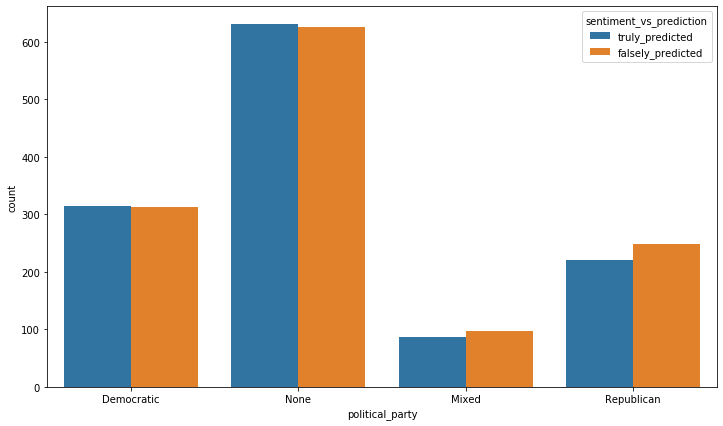

In [565]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=ab3, hue='sentiment_vs_prediction')

### Running the models on negative sentiments data for US elections

### Compared all the 7 models with both the vectorizers and for both stemmed and lemmatized data (BONUS section)

In [116]:
print(df_US.groupby(['negative_reason'])['negative_reason'].count())

negative_reason
corruption        220
covid19           405
crime             222
discrimination    215
others            202
Name: negative_reason, dtype: int64


In [117]:
neg = df_US[df_US['sentiment']==0]

In [118]:
neg.head()

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
5,accelerating. &amp; rising when all #Americans...,0,discrimination
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination


In [119]:
neg.shape

(1264, 3)

In [120]:
print(neg.groupby(['negative_reason'])['negative_reason'].count())

negative_reason
corruption        220
covid19           405
crime             222
discrimination    215
others            202
Name: negative_reason, dtype: int64


In [121]:
neg_t = list(neg['text'])

neg_l = list(neg['sentiment'])

neg_reason = list(neg['negative_reason'])

In [122]:
temp=[]
for i in range(len(neg_t)):
    a = neg_t[i]
    neg_t[i] = re.sub(r'http\S+|www.\S+|@\S+', '', neg_t[i])
    if len(neg_t[i])==0:
        neg_t[i]=a
        print(a)
        temp.append(i)

In [123]:
temp=[]
for i in range(len(neg_t)):
    a = neg_t[i]
    neg_t[i] = html.unescape(neg_t[i])
    if len(neg_t[i])==0:
        neg_t[i]=a
        print(a)
        temp.append(i)

In [124]:
attributes = string.punctuation
print(attributes)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [125]:
temp=[]
for i in range(len(neg_t)):
    a = neg_t[i]
    for char in attributes:
        neg_t[i] = neg_t[i].replace(char, '')
    if len(neg_t[i])==0:
        neg_t[i]=a
        print(a)
        temp.append(i)

In [126]:
temp=[]
for i in range(len(neg_t)):
    a = neg_t[i]
    neg_t[i] = re.sub(r'\Ab', '', neg_t[i]).strip()
    neg_t[i] = re.sub(r'\ART', '', neg_t[i]).strip()
    if len(neg_t[i])==0:
        neg_t[i]=a
        print(a)
        temp.append(i)

In [127]:
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U0001F1F2-\U0001F1F4"  # Macau flag
                              u"\U0001F1E6-\U0001F1FF"  # flags
                              u"\U0001F600-\U0001F64F"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U0001F1F2"
                              u"\U0001F1F4"
                              u"\U0001F620"
                              u"\u200d"
                              u"\u2640-\u2642"
                            "]+", flags=re.UNICODE)
print(emoji_pattern)

re.compile('[😀-🙏🌀-🗿🚀-\U0001f6ff\U0001f1e0-🇿🇲-🇴🇦-🇿😀-🙏✂-➰Ⓜ-🉑🤦-🤷🇲🇴😠\u200d♀-♂]+')


In [128]:
temp=[]
for i in range(len(neg_t)):
    a = neg_t[i]
    neg_t[i] = emoji_pattern.sub(r'', neg_t[i])
    if len(neg_t[i])==0:
        neg_t[i]=a
        print(a)
        temp.append(i)

In [129]:
for i in range(len(neg_t)):
    neg_t[i] = neg_t[i].lower()

In [130]:
neg_t[:28]

['so afraid of nov dec and jan even if bidenharris2020 winfrump has 3 months to do even more damage than he has',
 'lord sumption launches recovery  a new initiative to promote anotherway to deal with covid hysteria and rushed laws',
 'uber timing after biden advisors said they would put pressure on brazil  sanction  gov when elected',
 'accelerating  rising when all americans killed by trumpvirus are',
 '961 dead americans in one day 240 times the number who died after benghazi the right lost',
 'only reason  is doing more than 3 rallies is because he knows he is losing',
 'anyone whos concerned in the least about hunterbiden is a trump asskisser  human fraud wtf about the current',
 'breakingnews october catsoftwitter dogsoftwitter wake the fuck up its go time bidenharris2020',
 'is why ur campaign paid people off and rig and mess up postal mail',
 'tuesday night i refuse to watch any tv hype just build me a big ass fire open a bottle of wine and hope i',
 'if you maga think this is 

In [131]:
with open('stop_words.txt','r') as f:
    stop_custom = f.readlines()
    stop_custom = [line.strip() for line in stop_custom]

In [132]:
stop_words = stopwords.words('english')
stop_words.extend(stop_custom)

temp=[]
nega=[]
for j in range(len(neg_t)):
    s=[]
    i = neg_t[j]
    a = i
    for word in nltk.word_tokenize(i):
        if word not in stop_words:
            s.append(word)
    if len(s)==0:
        s = a
        print(s) 
        temp.append(j)
    nega.append(s)

In [133]:
sb = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer() 
lemma_neg = []
stem_neg = []

for i in nega:
    stemmed = [sb.stem(word) for word in i] # stemming the tweets
    stem_neg.append(stemmed)

for i in nega:
    temp = [lemmatizer.lemmatize(word) for word in i]
    lemma_neg.append(temp)

In [134]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(stem_neg, neg_reason, test_size=0.3, stratify = neg_reason, random_state=42)

In [135]:
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(lemma_neg, neg_reason, test_size=0.3, stratify = neg_reason, random_state=42)

In [136]:
train_tf_ns = [' '.join(tweet) for tweet in X_train_ns]
train_tf_nl = [' '.join(tweet) for tweet in X_train_nl]

test_tf_ns = [' '.join(tweet) for tweet in X_test_ns]
test_tf_nl = [' '.join(tweet) for tweet in X_test_nl]

In [137]:
vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)

array_train_tf_ns = vectorizer_TFIDF_gen.fit_transform(train_tf_ns)
array_test_tf_ns = vectorizer_TFIDF_gen.transform(test_tf_ns)

array_train_tf_nl = vectorizer_TFIDF_gen.fit_transform(train_tf_nl)
array_test_tf_nl = vectorizer_TFIDF_gen.transform(test_tf_nl)

In [138]:
vectorizer_WF_gen = CountVectorizer(max_features=1000)

array_train_WF_ns = vectorizer_WF_gen.fit_transform(train_tf_ns)
array_test_WF_ns = vectorizer_WF_gen.transform(test_tf_ns)

array_train_WF_nl = vectorizer_WF_gen.fit_transform(train_tf_nl)
array_test_WF_nl = vectorizer_WF_gen.transform(test_tf_nl)

In [140]:
nb_bow_ns = naive_bayes_multinomialNB(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
nb_bow_nl = naive_bayes_multinomialNB(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
nb_tf_ns = naive_bayes_multinomialNB(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
nb_tf_nl = naive_bayes_multinomialNB(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

The accuracy of the Naive-Bayes MultinomialNB Classifier model is:  28.421052631578945
                precision    recall  f1-score   support

    corruption       0.25      0.24      0.25        66
       covid19       0.34      0.52      0.41       122
         crime       0.24      0.16      0.20        67
discrimination       0.28      0.20      0.24        64
        others       0.11      0.07      0.08        61

      accuracy                           0.28       380
     macro avg       0.25      0.24      0.23       380
  weighted avg       0.26      0.28      0.26       380

[[16 32  7  6  5]
 [19 64 11 14 14]
 [ 7 35 11  7  7]
 [12 26  6 13  7]
 [10 31 10  6  4]]
The accuracy of the Naive-Bayes MultinomialNB Classifier model is:  28.947368421052634
                precision    recall  f1-score   support

    corruption       0.23      0.24      0.24        66
       covid19       0.37      0.54      0.44       122
         crime       0.26      0.19      0.22        67
dis

In [142]:
_, _, logreg_bow_ns = logreg(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
_, _, logreg_bow_nl = logreg(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
_, _, logreg_tf_ns = logreg(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
_, _, logreg_tf_nl = logreg(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Log Reg model is:  30.263157894736842
                precision    recall  f1-score   support

    corruption       0.29      0.29      0.29        66
       covid19       0.36      0.52      0.43       122
         crime       0.29      0.25      0.27        67
discrimination       0.26      0.16      0.19        64
        others       0.13      0.08      0.10        61

      accuracy                           0.30       380
     macro avg       0.26      0.26      0.26       380
  weighted avg       0.28      0.30      0.28       380

[[19 27  7  5  8]
 [18 64 12 12 16]
 [ 6 31 17  6  7]
 [14 29  8 10  3]
 [ 8 27 15  6  5]]
The accuracy of the Log Reg model is:  32.36842105263158
                precision    recall  f1-score   support

    corruption       0.30      0.29      0.29        66
       covid19       0.37      0.57      0.45       122
         crime       0.32      0.27      0.29        67
discrimination       0.29      0.14      0.19        64
      

In [144]:
dt_bow_ns = decision_tree(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
dt_bow_nl = decision_tree(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
dt_tf_ns = decision_tree(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
dt_tf_nl = decision_tree(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

The accuracy of the Decision Tree Classifier model is:  24.736842105263158
                precision    recall  f1-score   support

    corruption       0.21      0.32      0.25        66
       covid19       0.30      0.30      0.30       122
         crime       0.28      0.27      0.27        67
discrimination       0.24      0.17      0.20        64
        others       0.15      0.11      0.13        61

      accuracy                           0.25       380
     macro avg       0.24      0.24      0.23       380
  weighted avg       0.25      0.25      0.24       380

[[21 23 10  5  7]
 [31 37 21 16 17]
 [10 26 18  6  7]
 [16 22  7 11  8]
 [21 17  9  7  7]]
The accuracy of the Decision Tree Classifier model is:  26.842105263157894
                precision    recall  f1-score   support

    corruption       0.28      0.29      0.29        66
       covid19       0.34      0.41      0.37       122
         crime       0.21      0.18      0.19        67
discrimination       0.21  

In [146]:
rf_bow_ns = ran_forest(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
rf_bow_nl = ran_forest(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
rf_tf_ns = ran_forest(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
rf_tf_nl = ran_forest(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Classifier model is:  31.05263157894737
                precision    recall  f1-score   support

    corruption       0.30      0.27      0.29        66
       covid19       0.33      0.48      0.39       122
         crime       0.32      0.27      0.29        67
discrimination       0.29      0.28      0.29        64
        others       0.25      0.10      0.14        61

      accuracy                           0.31       380
     macro avg       0.30      0.28      0.28       380
  weighted avg       0.30      0.31      0.30       380

[[18 28  8  7  5]
 [20 58 14 22  8]
 [ 8 31 18  7  3]
 [10 28  6 18  2]
 [ 4 33 10  8  6]]
The accuracy of the Random Forest Classifier model is:  29.210526315789476
                precision    recall  f1-score   support

    corruption       0.28      0.30      0.29        66
       covid19       0.34      0.48      0.40       122
         crime       0.28      0.24      0.26        67
discrimination       0.20   

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[25 23  5  7  6]
 [21 67  9 14 11]
 [10 28 21  4  4]
 [15 27  8 11  3]
 [20 25  9  3  4]]
The accuracy of the Random Forest Classifier model is:  29.47368421052631
                precision    recall  f1-score   support

    corruption       0.28      0.29      0.28        66
       covid19       0.34      0.51      0.41       122
         crime       0.24      0.18      0.21        67
discrimination       0.30      0.22      0.25        64
        others       0.14      0.08      0.10        61

      accuracy                           0.29       380
     macro avg       0.26      0.26      0.25       380
  weighted avg       0.27      0.29      0.28       380

[[19 30  8  4  5]
 [17 62 16 14 13]
 [12 32 12  6  5]
 [ 5 32  6 14  7]
 [16 24  7  9  5]]


C:\Users\goela\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
xgb_bow_ns = xgb_classifier(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
xgb_bow_nl = xgb_classifier(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
xgb_tf_ns = xgb_classifier(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
xgb_tf_nl = xgb_classifier(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

The accuracy of the XGBoost Classifier model is:  32.631578947368425
                precision    recall  f1-score   support

    corruption       0.32      0.27      0.29        66
       covid19       0.40      0.61      0.48       122
         crime       0.29      0.25      0.27        67
discrimination       0.21      0.12      0.16        64
        others       0.16      0.10      0.12        61

      accuracy                           0.33       380
     macro avg       0.27      0.27      0.26       380
  weighted avg       0.29      0.33      0.30       380

[[18 26 10  7  5]
 [13 75 13 11 10]
 [ 7 30 17  8  5]
 [ 7 31  7  8 11]
 [12 27 11  5  6]]
The accuracy of the XGBoost Classifier model is:  31.842105263157894
                precision    recall  f1-score   support

    corruption       0.29      0.23      0.25        66
       covid19       0.39      0.63      0.48       122
         crime       0.28      0.19      0.23        67
discrimination       0.21      0.14    

In [150]:
svm_bow_ns = svm_classifier(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
svm_bow_nl = svm_classifier(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
svm_tf_ns = svm_classifier(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
svm_tf_nl = svm_classifier(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

The accuracy of the SVM Classifier model is:  25.789473684210527
                precision    recall  f1-score   support

    corruption       0.24      0.27      0.25        66
       covid19       0.35      0.34      0.34       122
         crime       0.25      0.30      0.27        67
discrimination       0.17      0.16      0.16        64
        others       0.20      0.15      0.17        61

      accuracy                           0.26       380
     macro avg       0.24      0.24      0.24       380
  weighted avg       0.26      0.26      0.26       380

[[18 19  8  9 12]
 [24 41 18 24 15]
 [ 9 22 20  9  7]
 [15 22 14 10  3]
 [10 14 20  8  9]]
The accuracy of the SVM Classifier model is:  29.47368421052631
                precision    recall  f1-score   support

    corruption       0.29      0.29      0.29        66
       covid19       0.36      0.43      0.39       122
         crime       0.30      0.27      0.28        67
discrimination       0.22      0.20      0.21   

In [152]:
knn_bow_ns = knn(array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns)
knn_bow_nl = knn(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)
knn_tf_ns = knn(array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns)
knn_tf_nl = knn(array_train_tf_nl,array_test_tf_nl,y_train_nl,y_test_nl)

The accuracy of the KNN model is:  27.89473684210526
                precision    recall  f1-score   support

    corruption       0.23      0.39      0.29        66
       covid19       0.31      0.47      0.38       122
         crime       0.32      0.12      0.17        67
discrimination       0.25      0.22      0.23        64
        others       0.25      0.02      0.03        61

      accuracy                           0.28       380
     macro avg       0.27      0.24      0.22       380
  weighted avg       0.28      0.28      0.25       380

[[26 30  4  6  0]
 [43 57  6 14  2]
 [ 8 37  8 13  1]
 [17 27  6 14  0]
 [20 30  1  9  1]]
The accuracy of the KNN model is:  27.368421052631582
                precision    recall  f1-score   support

    corruption       0.17      0.21      0.19        66
       covid19       0.32      0.64      0.43       122
         crime       0.22      0.06      0.09        67
discrimination       0.25      0.08      0.12        64
        others

### Comparing the accuracies of all the models for stemmed data

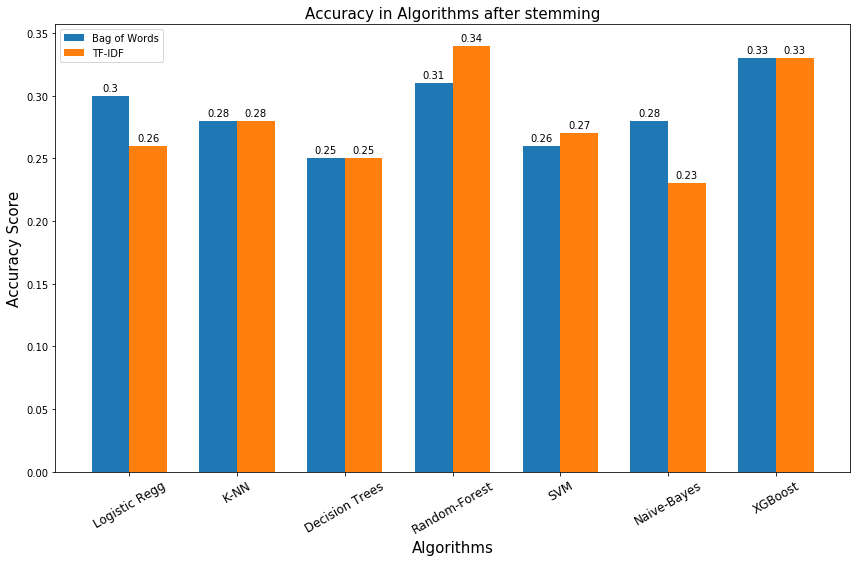

In [153]:
labels = ['Logistic Regg', 'K-NN', 'Decision Trees', 'Random-Forest', 'SVM', 'Naive-Bayes', 'XGBoost']
y_bow_ns = [round(logreg_bow_ns,2), round(knn_bow_ns,2), round(dt_bow_ns,2), round(rf_bow_ns,2), round(svm_bow_ns,2), round(nb_bow_ns,2), round(xgb_bow_ns,2)]
y_tf_ns = [round(logreg_tf_ns,2), round(knn_tf_ns,2), round(dt_tf_ns,2), round(rf_tf_ns,2), round(svm_tf_ns,2), round(nb_tf_ns,2), round(xgb_tf_ns,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, y_bow_ns, width, label='Bag of Words')
rects2 = ax.bar(x + width/2, y_tf_ns, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after stemming', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

### Comparing the accuracies of all the models for lemmatized data

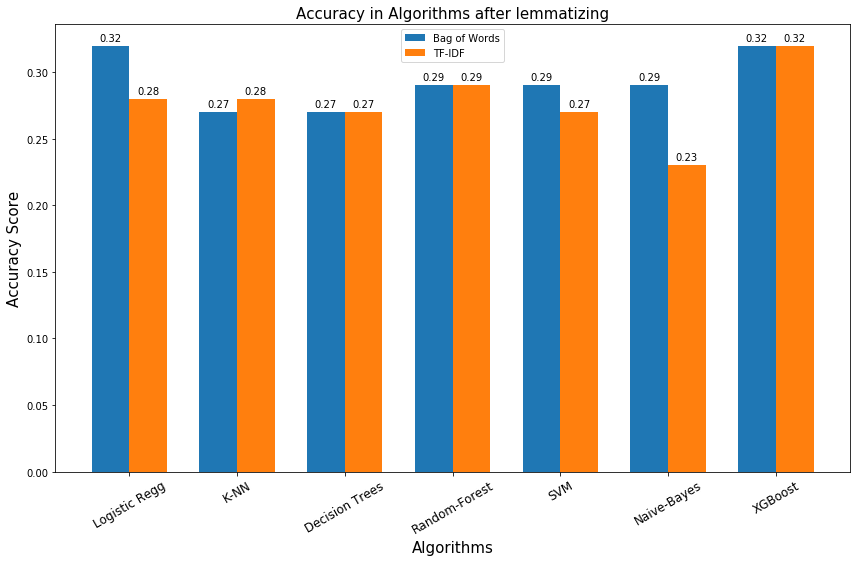

In [154]:
labels = ['Logistic Regg', 'K-NN', 'Decision Trees', 'Random-Forest', 'SVM', 'Naive-Bayes', 'XGBoost']
y_bow_nl = [round(logreg_bow_nl,2), round(knn_bow_nl,2), round(dt_bow_nl,2), round(rf_bow_nl,2), round(svm_bow_nl,2), round(nb_bow_nl,2), round(xgb_bow_nl,2)]
y_tf_nl = [round(logreg_tf_nl,2), round(knn_tf_nl,2), round(dt_tf_nl,2), round(rf_tf_nl,2), round(svm_tf_nl,2), round(nb_tf_nl,2), round(xgb_tf_nl,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, y_bow_nl, width, label='Bag of Words')
rects2 = ax.bar(x + width/2, y_tf_nl, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after lemmatizing', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

### Comparing the accuracies of all the models

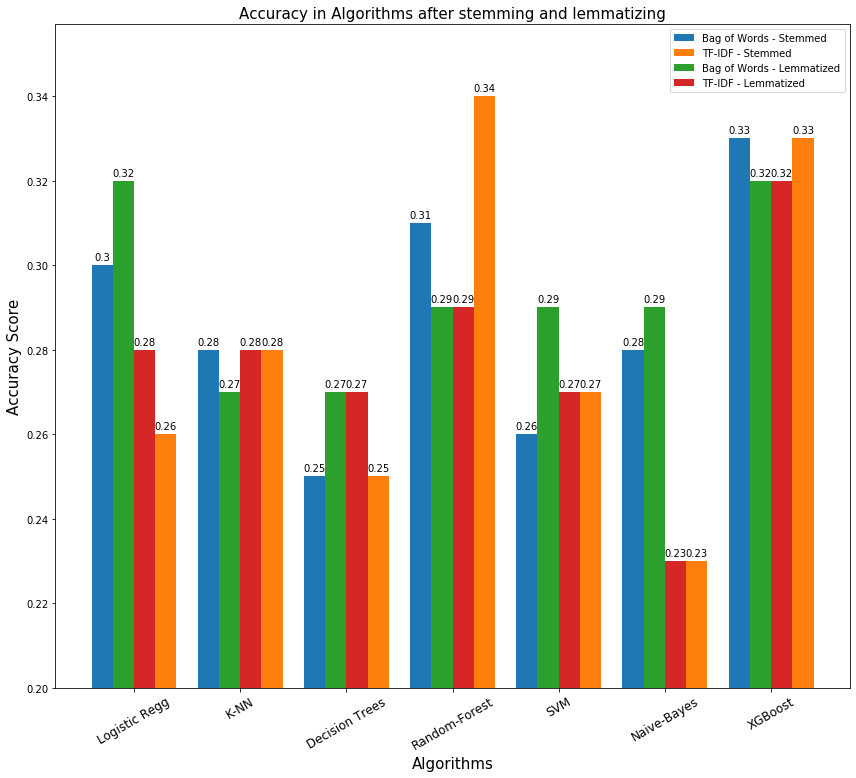

In [156]:
width = 0.2

fig, ax = plt.subplots(figsize=(12,10))
rects1 = ax.bar(x - width*3/2, y_bow_ns, width, label='Bag of Words - Stemmed')
rects2 = ax.bar(x + width*3/2, y_tf_ns, width, label='TF-IDF - Stemmed')
rects3 = ax.bar(x - width/2, y_bow_nl, width, label='Bag of Words - Lemmatized')
rects4 = ax.bar(x + width/2, y_tf_nl, width, label='TF-IDF - Lemmatized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms after stemming and lemmatizing' , fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_ylim(ymin = 0.2)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 30,  fontsize = 12)
plt.show()

### hyperparameter tuning and cross-validation of the 3 best models (BONUS Section)

In [160]:
Log_Reg=LogisticRegression()

steps = [('Log_Reg', Log_Reg)]

pipeline = Pipeline(steps)

parameters = {'Log_Reg__C' : [0.1,0.5,1,5,10,50,100] , 'Log_Reg__solver' : ['newton-cg','lbfgs','sag','saga']}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(array_train_WF_nl, y_train_nl)  

print('Best score and parameter combination = ')
# ,array_test_WF_nl,y_test_nl
print(CV.best_score_)
print(CV.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   39.8s finished
C:\Users\goela\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score and parameter combination = 
0.35407239819004527
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'newton-cg'}


In [163]:
Ran_For=RandomForestClassifier()

steps = [('Ran_For', Ran_For)]

pipeline = Pipeline(steps)

parameters = {'Ran_For__max_depth' : [80,90,100,110] , \
              'Ran_For__max_features' : [2,3,4] ,\
              'Ran_For__min_samples_leaf' : [3,4,5] ,\
              'Ran_For__min_samples_split' : [8,10,12] ,\
              'Ran_For__n_estimators' : [100,200,500]}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(array_train_tf_ns, y_train_ns)  

print('Best score and parameter combination = ')
# array_train_tf_ns,array_test_tf_ns,y_train_ns,y_test_ns
print(CV.best_score_)
print(CV.best_params_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  7.8min finished


Best score and parameter combination = 
0.3201357466063348
{'Ran_For__max_depth': 80, 'Ran_For__max_features': 2, 'Ran_For__min_samples_leaf': 3, 'Ran_For__min_samples_split': 8, 'Ran_For__n_estimators': 100}


In [164]:
XGB=XGBClassifier()

steps = [('XGB', XGB)]

pipeline = Pipeline(steps)

parameters = {'XGB__max_depth' : [80,90,100,110] , \
              'XGB__max_features' : [2,3,4] ,\
              'XGB__min_samples_leaf' : [3,4,5] ,\
              'XGB__min_samples_split' : [8,10,12] ,\
              'XGB__n_estimators' : [100,200,500]}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(array_train_WF_ns, y_train_ns)  

print('Best score and parameter combination = ')
# array_train_WF_ns,array_test_WF_ns,y_train_ns,y_test_ns
print(CV.best_score_)
print(CV.best_params_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 69.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 136.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 177.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 180.7min finished
C:\Users\goela\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[20:26:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best score and parameter combination = 
0.31221719457013575
{'XGB__max_depth': 110, 'XGB__max_features': 2, 'XGB__min_samples_leaf': 3, 'XGB__min_samples_split': 8, 'XGB__n_estimators': 200}


### the best score is coming for the Logestic Regression model for C=0.1 and solver= newton-cg

### running the data on tunned model

In [167]:
def logreg_tunned(X_train, X_test, y_train, y_test):
    
    '''Function for modeling based on Logistic Regression'''
    
    model_lg = LogisticRegression(C=0.1, solver='newton-cg')
    model_lg.fit(X_train,y_train)
    
    predictions = model_lg.predict(X_test)
    
    score = accuracy_score(y_test,predictions)

    print ("The accuracy of the Log Reg model is: ", score*100)
    
    print(classification_report(y_test,predictions))
    
    print (confusion_matrix(y_test,predictions))
    
    return model_lg, predictions, score

In [168]:
_, _, logreg_bow_nl_tunned = logreg_tunned(array_train_WF_nl,array_test_WF_nl,y_train_nl,y_test_nl)

C:\Users\goela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Log Reg model is:  35.0
                precision    recall  f1-score   support

    corruption       0.40      0.06      0.11        66
       covid19       0.34      0.99      0.51       122
         crime       0.75      0.04      0.08        67
discrimination       0.67      0.06      0.11        64
        others       0.33      0.02      0.03        61

      accuracy                           0.35       380
     macro avg       0.50      0.24      0.17       380
  weighted avg       0.48      0.35      0.22       380

[[  4  61   0   1   0]
 [  1 121   0   0   0]
 [  1  62   3   0   1]
 [  3  55   1   4   1]
 [  1  58   0   1   1]]


# Q5. Results and BONUS section

### Covered and mentioned in the whole notebook